receiving incremental file list
benchmark_results.csv

sent 61 bytes  received 2,227 bytes  1,525.33 bytes/sec
total size is 2,098  speedup is 0.92
✅ Sincronizzazione completata con successo!


,Target,K,Average,Speedup (Plain)
0,softmax_auto,64,5.023200e-06,1.340659
1,softmax_avx,64,7.416000e-07,9.080906


,Target,K,Average,Speedup (Plain)
3,softmax_auto,71,1.048740e-05,0.614433
4,softmax_avx,71,8.506000e-07,7.575594


,Target,K,Average,Speedup (Plain)
6,softmax_auto,517,0.000015,0.739719
7,softmax_avx,517,0.000002,4.776996


,Target,K,Average,Speedup (Plain)
9,softmax_auto,1031,0.000017,0.945750
10,softmax_avx,1031,0.000005,3.331124


,Target,K,Average,Speedup (Plain)
12,softmax_auto,10204,0.000046,2.694661
13,softmax_avx,10204,0.000036,3.492661


,Target,K,Average,Speedup (Plain)
15,softmax_auto,102040,0.000392,2.898748
16,softmax_avx,102040,0.000345,3.296358


,Target,K,Average,Speedup (Plain)
18,softmax_auto,1048576,0.003885,2.940594
19,softmax_avx,1048576,0.003228,3.539771


,Target,K,Average,Speedup (Plain)
21,softmax_auto,1048580,0.003887,2.942786
22,softmax_avx,1048580,0.003232,3.539585


,Target,K,Average,Speedup (Plain)
24,softmax_auto,1048583,0.003877,2.938243
25,softmax_avx,1048583,0.003228,3.529341


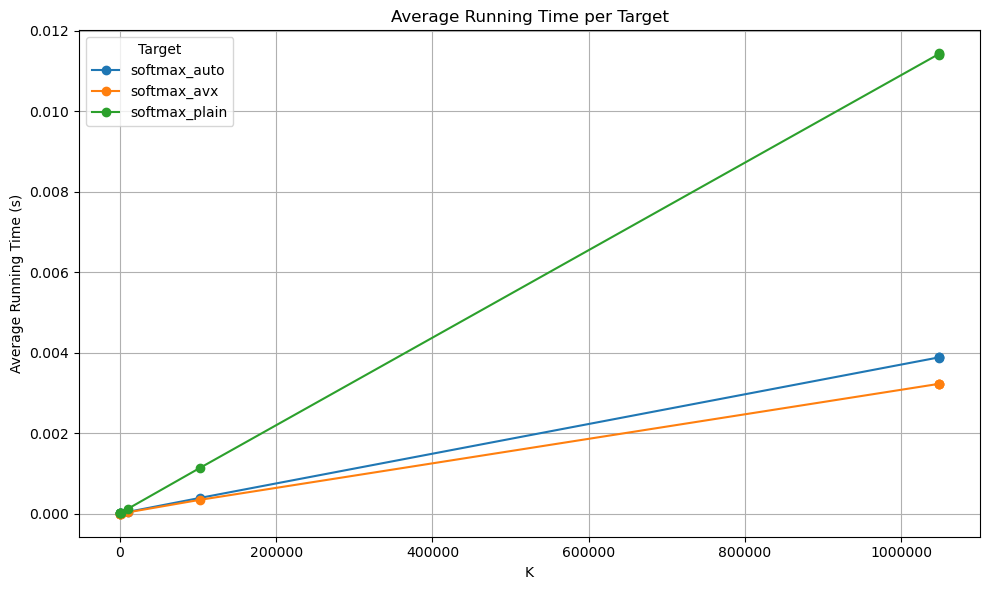

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

import subprocess

# Definisci il comando rsync
rsync_command = [
    "rsync", "-av",
    "l.rizzo11@spmcluster.unipi.it:~/SPM-assignment/assignment1/out/*", "./out"
]

# Esegui il comando
try:
    subprocess.run(rsync_command, check=True)
    print("✅ Sincronizzazione completata con successo!")
except subprocess.CalledProcessError as e:
    print(f"❌ Errore durante rsync: {e}")


NUM_RUNS = 5
num_cols = 2 + NUM_RUNS
benchmark_file = "./out/benchmark_results.csv"

col_names = ['Target', 'K'] + [f'run_{i+1}' for i in range(NUM_RUNS)]

df = pd.read_csv(benchmark_file, header=None, names=col_names)

run_cols = [f'run_{i+1}' for i in range(NUM_RUNS)]
df[run_cols] = df[run_cols].apply(pd.to_numeric, errors='coerce')
df['K'] = pd.to_numeric(df['K'], errors='coerce')
df['Average'] = df[run_cols].mean(axis=1)
df['8_div_K'] = (df['K'] % 8) == 0
plt.figure(figsize=(10,6))
for K in df['K'].unique():
    plain_avg = df[(df['Target'] == 'softmax_plain') & (df['K'] == K)]['Average'].values[0]
    df.loc[df['K'] == K, 'Speedup (Plain)'] = plain_avg / df.loc[df['K'] == K, 'Average']

for K in df['K'].unique(): 
    display(df[(df['Target'] != 'softmax_plain') & (df['K'] == K)][['Target', 'K', 'Average', 'Speedup (Plain)']])

# Per ciascun Target unico crea una linea diversa
for target in df['Target'].unique():
    sub_df = df[df['Target'] == target]
    plt.plot(sub_df['K'], sub_df['Average'], marker='o', label=target)

plt.title("Average Running Time per Target")
plt.xlabel("K")
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel("Average Running Time (s)")
plt.grid(True)
plt.legend(title="Target")
plt.tight_layout()
plt.savefig("./out/benchmark_target_avg.png")
plt.show()


In [32]:
rsync_command = [
    "rsync", "-av",
    "l.rizzo11@spmcluster.unipi.it:~/SPM-assignment/out/*", "./out"
]

# Esegui il comando
try:
    subprocess.run(rsync_command, check=True)
    print("✅ Sincronizzazione completata con successo!")
except subprocess.CalledProcessError as e:
    print(f"❌ Errore durante rsync: {e}")

def sum_file(filename):
    """Legge un file e somma tutti i numeri float riga per riga."""
    with open(filename, 'r') as f:
        total = sum(float(line.strip()) for line in f)
    return total


# Somma i valori di ciascun file
sums = {filename: sum_file(filename) for filename in ['out/softmax_auto.txt', 'out/softmax_avx.txt', 'out/softmax_plain.txt']}

# Stampa i risultati
for file, total in sums.items():
    print(f"Sum of {file}: {total}")

receiving incremental file list
softmax_auto.txt
softmax_avx.txt
softmax_plain.txt

sent 81 bytes  received 28,318,709 bytes  2,097,688.15 bytes/sec
total size is 28,311,552  speedup is 1.00
✅ Sincronizzazione completata con successo!
Sum of out/softmax_auto.txt: 0.980842
Sum of out/softmax_avx.txt: 0.980842
Sum of out/softmax_plain.txt: 0.9807739999999999
